## Little training monitor

Tails a `lighting_logs/version_X` directory for train/val loss.

In [20]:
# %pip install datasets transformers zstandard matplotlib
import torch
import text_data
import conv_text
import numpy as np
import pandas as pd


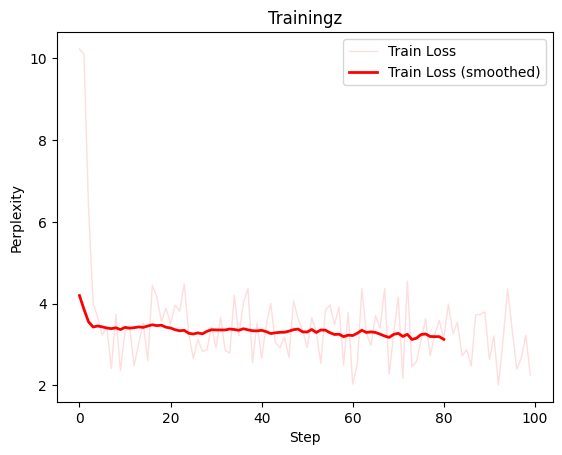

In [57]:
tdat = pd.read_csv('lightning_logs/version_2/metrics.csv')
train = tdat.train_loss[~np.isnan(tdat.train_loss)]

xspace = np.linspace(0, len(train), len(train))
fsz = max(20, len(train)//20)
filter = np.ones(fsz)/fsz
# filter =  np.linspace(0.25, 1.75, num=fsz)/fsz

import matplotlib.pyplot as plt

plt.plot( train, label = 'Train Loss', color='#fdd', linewidth=1)
plt.plot( np.convolve(train, filter, mode='valid'), label = 'Train Loss (smoothed)', color='r', linewidth=2)
if 'val_loss' in tdat.columns:
    val = tdat.val_loss[~np.isnan(tdat.val_loss)]
    plt.plot( val, label = 'Val\'n Loss', color='#44f', linewidth=1)

plt.xlabel('Step')
plt.ylabel('Perplexity')
plt.legend(loc='upper right')
plt.title('Trainingz')
plt.show()


In [58]:
np.mean(tdat.train_loss[-100:])


3.456400628089905

In [56]:
tdat.val_loss[~np.isnan(tdat.val_loss)]

AttributeError: 'DataFrame' object has no attribute 'val_loss'

In [53]:
tdat[-100:]

,train_loss,length,epoch,step
0,10.232624,23.0,0,99
1,10.099389,39.0,0,199
2,6.326608,32.0,0,299
3,4.005255,52.0,0,399
4,3.671723,41.0,0,499
...,...,...,...,...
84,2.719912,33.0,0,8499
85,2.873328,38.0,0,8599
86,2.470640,36.0,0,8699
87,3.724512,24.0,0,8799
